In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
x_train = np.memmap('drive/My Drive/Xtrain.dat', shape=(600000, 2351), dtype=np.float32)
y_train = np.memmap('drive/My Drive/Ytrain.dat', dtype=np.float32)
# 0 for benign (nb of elm => 300000)
# 1 for malicious (nb of elm => 300000)

In [4]:
print(x_train.shape)
print(y_train.shape)

(600000, 2351)
(600000,)


In [0]:
# normalization
std_scaler = preprocessing.StandardScaler()
x_train = std_scaler.fit_transform(x_train)1

In [6]:
print(x_train)

[[-1.2577435  -0.68802667 -0.48261416 ... -0.009461   -0.00847232
   0.00417412]
 [-0.94415283  0.1411429   0.40310088 ... -0.009461   -0.00847232
   0.00417412]
 [-0.3332799   1.5952656  -0.26224568 ... -0.009461   -0.00847232
   0.00417412]
 ...
 [ 1.5286949  -0.28995672 -0.06742688 ... -0.009461   -0.00847232
   0.00417412]
 [ 1.4236372  -0.20901267 -0.32735172 ... -0.009461   -0.00847232
   0.00417412]
 [ 2.3949034  -0.68725026 -0.4644797  ... -0.009461   -0.00847232
   0.00417412]]


In [7]:
# split the data into two parts (training set and validation set)
x_train, x_test = x_train[:550000], x_train[550000:]
y_train, y_test = y_train[:550000], y_train[550000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550000, 2351)
(550000,)
(50000, 2351)
(50000,)


In [0]:
x_train = np.reshape(x_train, (550000, 1, 2351))
x_test = np.reshape(x_test, (50000, 1, 2351))

In [0]:
# neural net
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers

In [0]:
# create the model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(1, 2351)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 32)             305152    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 313,505
Trainable params: 313,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
adm = optimizers.adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])

In [14]:
# fit our model
history = model.fit(x_train, y_train, validation_split=0.15, epochs=4, shuffle=True)

467500/467500 [==============================] - 206s 441us/step - loss: 0.0684 - acc: 0.9771 - val_loss: 0.0411 - val_acc: 0.9869
Epoch 2/4
467500/467500 [==============================] - 173s 370us/step - loss: 0.0414 - acc: 0.9867 - val_loss: 0.0352 - val_acc: 0.9895
Epoch 3/4
467500/467500 [==============================] - 170s 364us/step - loss: 0.0344 - acc: 0.9890 - val_loss: 0.0389 - val_acc: 0.9886
Epoch 4/4
467500/467500 [==============================] - 170s 364us/step - loss: 0.0298 - acc: 0.9904 - val_loss: 0.0383 - val_acc: 0.9886


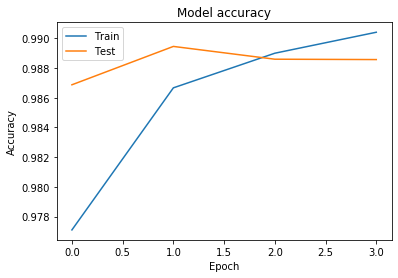

In [15]:
# evaluate our model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# save the model
model.save('drive/My Drive/models_save/lstm.h5')

In [0]:
model_ = load_model('drive/My Drive/models_save/lstm.h5')

In [18]:
loss, acc = model_.evaluate(x_test, y_test, verbose=2)
print("loss: " + str(loss))
print("acc: " + str(acc))

loss: 0.034896581664141266
acc: 0.98974
